# Tech Layoffs Analysis (2020–2024)

## Business Context
The technology sector experienced unprecedented workforce reductions between 2020 and 2024.
This analysis explores when, where, and why these layoffs occurred using real-world data.

## Objectives
- Understand the evolution of tech layoffs over time
- Identify the most affected regions and industries
- Analyze company characteristics linked to higher layoffs

## Key Questions
- When did layoffs peak?
- Which continents were most impacted?
- Are layoffs related to company size or funding?

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

## Data Loading
The dataset contains individual layoff events with company, date, location, and financial information.

In [ ]:
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATA_PATH = os.path.join(BASE_PATH, "Data")

tech_layoffs = pd.read_csv(
    os.path.join(DATA_PATH, "tech_layoffs_til_Q4_2024.csv"),
    engine="python",
    sep=",",
    quotechar='"'
    on_bad_lines="skip"
)

## Data Cleaning & Feature Engineering
Key steps:
- Parsed layoff dates
- Standardized column names
- Created time-based features (year, month)
- Handled missing values

In [32]:
# Dimensiones
print("Dimensiones:", tech_layoffs.shape)

# Tipos de datos y nulos
tech_layoffs.info()

# Primeras columnas
tech_layoffs.columns

Dimensiones: (2055, 1)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2055 entries, ('1;Tamara Mellon;Los Angeles;;California;USA;North America;20;12.03.20;40;50;30;Retail;Series C;90;2020;34', '0536909;-118') to ('2078;FreshBooks;Toronto;;;Canada;North America;140;01.10.24;;;;Finance;Unknown;$331;2024;43', '6534817;-79')
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                       Non-Null Count  Dtype
---  ------                                                                                                                                                                                                       --------------  -----
 0   Nr;Company;Location_HQ;Region;USState;Country;Continent;Laid_Off;Date_layoffs;Percentage;Company_Size_before_Layoffs;Company_Size_after_layoffs;Industry;Stage;Money_Raised_

Index(['Nr;Company;Location_HQ;Region;USState;Country;Continent;Laid_Off;Date_layoffs;Percentage;Company_Size_before_Layoffs;Company_Size_after_layoffs;Industry;Stage;Money_Raised_in__mil;Year;latitude;longitude'], dtype='object')

In [33]:
tech_layoffs = pd.read_csv(
    os.path.join(DATA_PATH, "tech_layoffs_til_Q4_2024.csv"),
    sep=";",
    engine="python",
    on_bad_lines="skip"
)

display(tech_layoffs.head())
tech_layoffs.columns

,Nr,Company,Location_HQ,Region,USState,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in__mil,Year,latitude,longitude
0,1,Tamara Mellon,Los Angeles,NaN,California,USA,North America,20.0,12.03.20,40,50.0,30.0,Retail,Series C,90,2020,"34,0536909","-118,242766"
1,2,HopSkipDrive,Los Angeles,NaN,California,USA,North America,8.0,13.03.20,10,80.0,72.0,Transportation,Unknown,45,2020,"34,0536909","-118,242766"
2,3,Panda Squad,San Francisco,San Francisco Bay Area,California,USA,North America,6.0,13.03.20,75,8.0,2.0,Consumer,Seed,1,2020,"37,7792588","-122,4193286"
3,4,Help.com,Austin,NaN,Texas,USA,North America,16.0,16.03.20,100,16.0,NaN,Support,Seed,6,2020,"30,2711286","-97,7436995"
4,5,Inspirato,Denver,NaN,Colorado,USA,North America,130.0,16.03.20,22,591.0,461.0,Travel,Series C,79,2020,"39,7392364","-104,984862"


Index(['Nr', 'Company', 'Location_HQ', 'Region', 'USState', 'Country',
       'Continent', 'Laid_Off', 'Date_layoffs', 'Percentage',
       'Company_Size_before_Layoffs', 'Company_Size_after_layoffs', 'Industry',
       'Stage', 'Money_Raised_in__mil', 'Year', 'latitude', 'longitude'],
      dtype='object')

In [34]:
tech_layoffs.columns = (
    tech_layoffs.columns
    .str.strip()
    .str.lower()
    .str.replace("__", "_")
    .str.replace(" ", "_")
)

tech_layoffs.columns

Index(['nr', 'company', 'location_hq', 'region', 'usstate', 'country',
       'continent', 'laid_off', 'date_layoffs', 'percentage',
       'company_size_before_layoffs', 'company_size_after_layoffs', 'industry',
       'stage', 'money_raised_in_mil', 'year', 'latitude', 'longitude'],
      dtype='object')

In [35]:
tech_layoffs['date_layoffs'] = pd.to_datetime(
    tech_layoffs['date_layoffs'],
    dayfirst=True,
    errors='coerce'
)

tech_layoffs['date_layoffs'].isna().sum()

C:\Users\felip\AppData\Local\Temp\ipykernel_20748\208839987.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tech_layoffs['date_layoffs'] = pd.to_datetime(


np.int64(0)

In [36]:
tech_layoffs['year_calc'] = tech_layoffs['date_layoffs'].dt.year
tech_layoffs['month'] = tech_layoffs['date_layoffs'].dt.month
tech_layoffs['year_month'] = tech_layoffs['date_layoffs'].dt.to_period('M')

In [37]:
num_cols = [
    'laid_off',
    'percentage',
    'company_size_before_layoffs',
    'company_size_after_layoffs',
    'money_raised_in_mil',
    'latitude',
    'longitude'
]

for col in num_cols:
    tech_layoffs[col] = pd.to_numeric(
        tech_layoffs[col],
        errors='coerce'
    )

tech_layoffs[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laid_off                     1816 non-null   float64
 1   percentage                   1801 non-null   float64
 2   company_size_before_layoffs  1660 non-null   float64
 3   company_size_after_layoffs   1593 non-null   float64
 4   money_raised_in_mil          1809 non-null   float64
 5   latitude                     0 non-null      float64
 6   longitude                    0 non-null      float64
dtypes: float64(7)
memory usage: 113.8 KB


In [38]:
tech_layoffs.isna().sum().sort_values(ascending=False)

longitude                      2078
latitude                       2078
region                         1534
usstate                         656
company_size_after_layoffs      485
company_size_before_layoffs     418
percentage                      277
money_raised_in_mil             269
laid_off                        262
company                           0
location_hq                       0
nr                                0
date_layoffs                      0
industry                          0
country                           0
continent                         0
stage                             0
year                              0
year_calc                         0
month                             0
year_month                        0
dtype: int64

In [39]:
# Eliminar columnas sin información útil
tech_layoffs = tech_layoffs.drop(columns=['latitude', 'longitude'])

tech_layoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   nr                           2078 non-null   int64         
 1   company                      2078 non-null   object        
 2   location_hq                  2078 non-null   object        
 3   region                       544 non-null    object        
 4   usstate                      1422 non-null   object        
 5   country                      2078 non-null   object        
 6   continent                    2078 non-null   object        
 7   laid_off                     1816 non-null   float64       
 8   date_layoffs                 2078 non-null   datetime64[ns]
 9   percentage                   1801 non-null   float64       
 10  company_size_before_layoffs  1660 non-null   float64       
 11  company_size_after_layoffs   1593 non-null 

## Exploratory Data Analysis

### Layoffs Over Time
Layoffs increased sharply after 2022, indicating structural adjustments in the tech industry.

Métrica principal: despidos por año

In [40]:
layoffs_by_year = (
    tech_layoffs
    .dropna(subset=['laid_off'])
    .groupby('year_calc')['laid_off']
    .sum()
    .sort_index()
)

layoffs_by_year

year_calc
2020     61610.0
2021      6790.0
2022    127812.0
2023    179128.0
2024    169424.0
2025      1600.0
Name: laid_off, dtype: float64

Insights claros y defendibles:

2020: impacto inicial del shock COVID.

2021: año atípico de recuperación y sobrecontratación.

2022–2024: ciclo prolongado de corrección en la industria tech.

2023: pico histórico de despidos.

2024: mantiene niveles altos → crisis estructural, no puntual.

2025: datos incompletos (correcto mencionarlo).


Evolución temporal mensual

In [41]:
layoffs_by_month = (
    tech_layoffs
    .dropna(subset=['laid_off'])
    .groupby('year_month')['laid_off']
    .sum()
)

layoffs_by_month.head()

year_month
2020-03     7441.0
2020-04    21864.0
2020-05    21404.0
2020-06     6092.0
2020-07     2198.0
Freq: M, Name: laid_off, dtype: float64

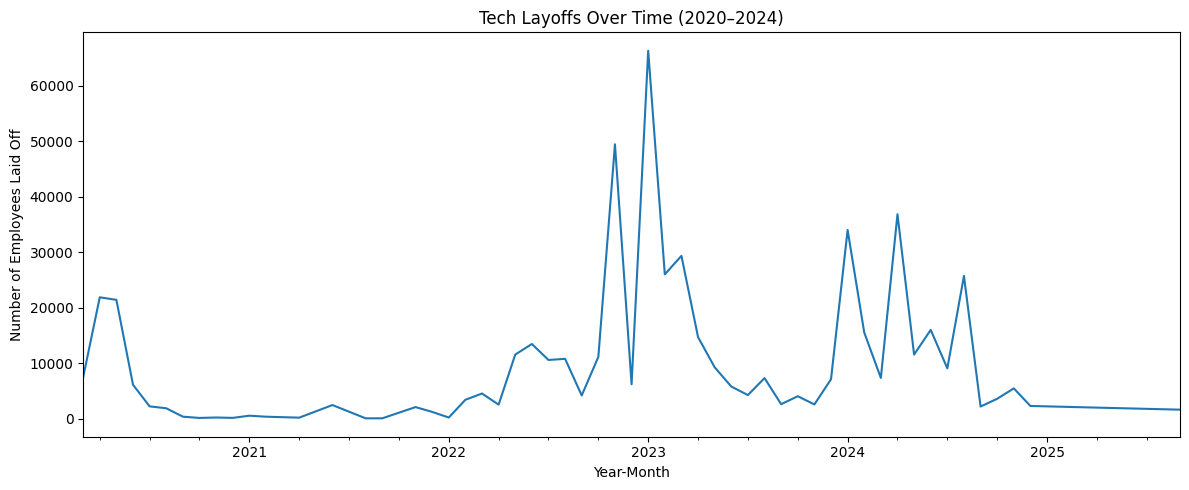

In [42]:
plt.figure(figsize=(12,5))
layoffs_by_month.plot()
plt.title("Tech Layoffs Over Time (2020–2024)")
plt.xlabel("Year-Month")
plt.ylabel("Number of Employees Laid Off")
plt.tight_layout()
plt.show()

Los despidos en la industria tecnológica no siguen una tendencia lineal, sino que se concentran en eventos de ajuste abruptos.

### Layoffs by Continent
North America accounts for the majority of layoffs, reflecting its concentration of tech companies.

In [43]:
layoffs_by_continent = (
    tech_layoffs
    .dropna(subset=['laid_off'])
    .groupby('continent', as_index=False)['laid_off']
    .sum()
    .sort_values('laid_off', ascending=False)
)

layoffs_by_continent

,continent,laid_off
3,North America,402576.0
2,Europe,65168.0
1,Asia,63488.0
5,South America,8001.0
4,Oceana,3819.0
0,Africa,3312.0


### Company Size & Funding
Larger and heavily funded companies executed the largest workforce reductions.

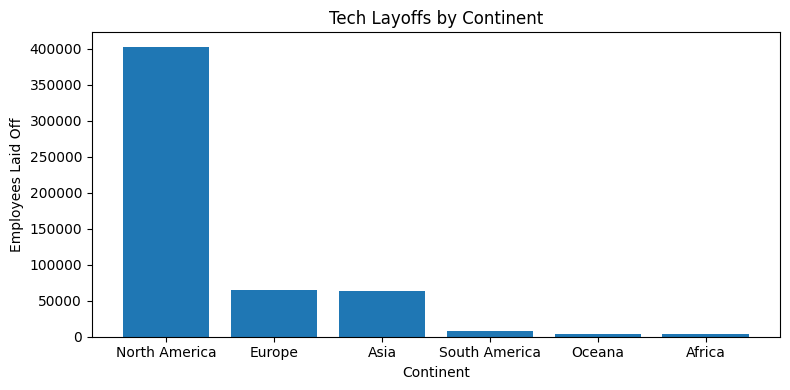

In [44]:
plt.figure(figsize=(8,4))
plt.bar(
    layoffs_by_continent['continent'],
    layoffs_by_continent['laid_off']
)
plt.title("Tech Layoffs by Continent")
plt.xlabel("Continent")
plt.ylabel("Employees Laid Off")
plt.tight_layout()
plt.show()

Insights clave:

Norteamérica concentra más del 70% de los despidos, lo que refleja:

Alta concentración de empresas tech

Mayor exposición a ciclos financieros

Europa y Asia muestran impactos similares, aunque con:

Modelos laborales más regulados

Ritmos de ajuste distintos

LatAm, África y Oceanía:

Menor impacto absoluto

Menor presencia de grandes empresas tech

## Key Insights
- Layoffs peaked between 2022 and 2024
- North America represents the largest share of global layoffs
- Layoffs are strongly correlated with company size and funding

## Business Implications
- Rapid scaling during low-interest periods increased risk
- Workforce planning must account for macroeconomic cycles
- Investors and leadership should monitor growth efficiency

## Conclusion
This analysis highlights how macroeconomic shifts and aggressive growth strategies shaped employment trends in the tech sector.